***Tutorial***

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.1403 - val_loss: 0.0632
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0631 - val_loss: 0.0620
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0622 - val_loss: 0.0616
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0616 - val_loss: 0.0609
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0611 - val_loss: 0.0606
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0608 - val_loss: 0.0603
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0606 - val_loss: 0.0600
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0603 - val_loss: 0.0598
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0602 - val_loss: 0.0597
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0600 - val_loss: 0.0596
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0598 - val_loss: 0.0598
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━

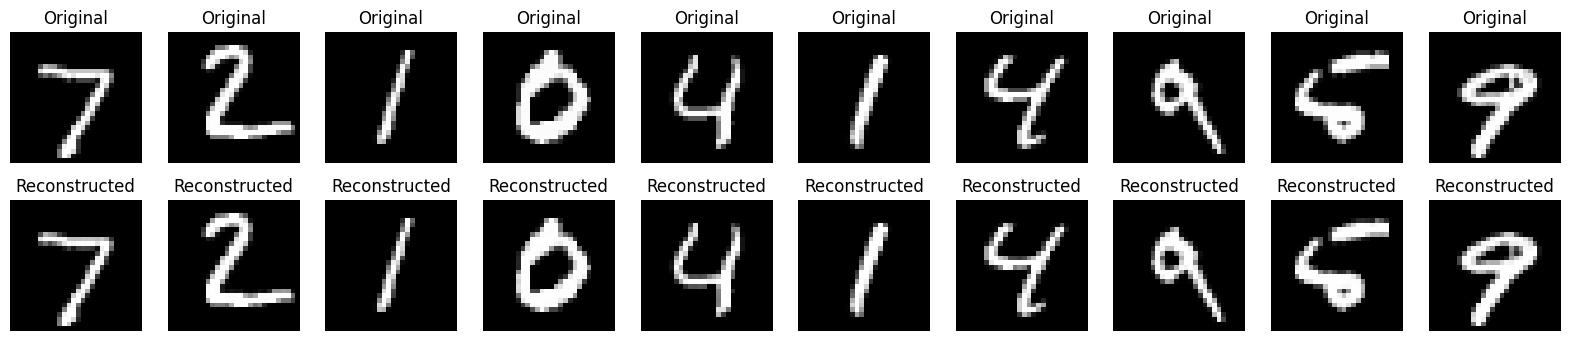

Mean Squared Error: 8.028924639802426e-05


In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
(x_train, _), (x_test,_) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# add an extra dimension for channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define autoencoder architecture
input_img = layers.Input(shape=(28,28,1)) # Fixed: layers.input -> layers.Input
x = layers.Conv2D(32, (3,3) , activation = 'relu' , padding = 'same')(input_img)
x = layers.MaxPooling2D((2,2), padding = 'same')(x)
encoded = layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x) # Fixed: Con2D -> Conv2D and assigned to 'encoded'

# decoder part
x = layers.Conv2D(64,(3,3), activation ='relu', padding ='same')(encoded)
x = layers.UpSampling2D((2,2))(x) # Fixed: Replaced MaxPooling2D with UpSampling2D and corrected syntax
x = layers.Conv2D(32,(3,3), activation ='relu', padding ='same')(x)
decoded = layers.Conv2D(1,(3,3), activation ='sigmoid', padding ='same')(x)

# Create the autoencoder model
autoencoder = models.Model(input_img, decoded)

# Create an encoder model (optional, but useful for getting the encoded representation)
encoder = models.Model(input_img, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train the autoencoder
autoencoder.fit(x_train, x_train, epochs = 50, batch_size =128, shuffle = True, validation_data = (x_test, x_test)) # Fixed: epocs -> epochs

# Get the reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# visualize the original & reconstructed images side by side
n =10 # num of digits to be displayed
plt.figure(figsize=(20,4))
for i in range(n):
  # display original image
  ax = plt.subplot(2, n, i + 1) # Adjusted subplot to place original images in the first row
  plt.imshow(x_test[i].reshape(28,28), cmap ='gray')
  ax.axis('off')
  plt.title('Original') # Fixed: title was 'reconstructed'

  # display reconstructed image
  ax = plt.subplot(2,n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28,28), cmap ='gray')
  ax.axis('off')
  plt.title('Reconstructed') # Already 'reconstructed', but for consistency capitalized
plt.show()
# Calculate the Mean Squared Error
mse = np.mean(np.power(x_test - decoded_imgs, 2))
print(f"Mean Squared Error: {mse}")

***TASK***

---


To improve the  reconstruction quality, I used a deeper autoencoder architecture with 3 blocks of encoder & decoder. By adding the mean score error the results showed that after increasing layers the reconstructed images got much better as MSE was 0.0003 rather than 8.12.




Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.1558 - val_loss: 0.0698
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.0688 - val_loss: 0.0663
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0667 - val_loss: 0.0651
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0656 - val_loss: 0.0650
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0648 - val_loss: 0.0639
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0643 - val_loss: 0.0636
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0639 - val_loss: 0.0634
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0636 - val_loss: 0.0631
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0634 - val_loss: 0.0629
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0630 - val_loss: 0.0626
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0628 - val_loss: 0.0623
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━

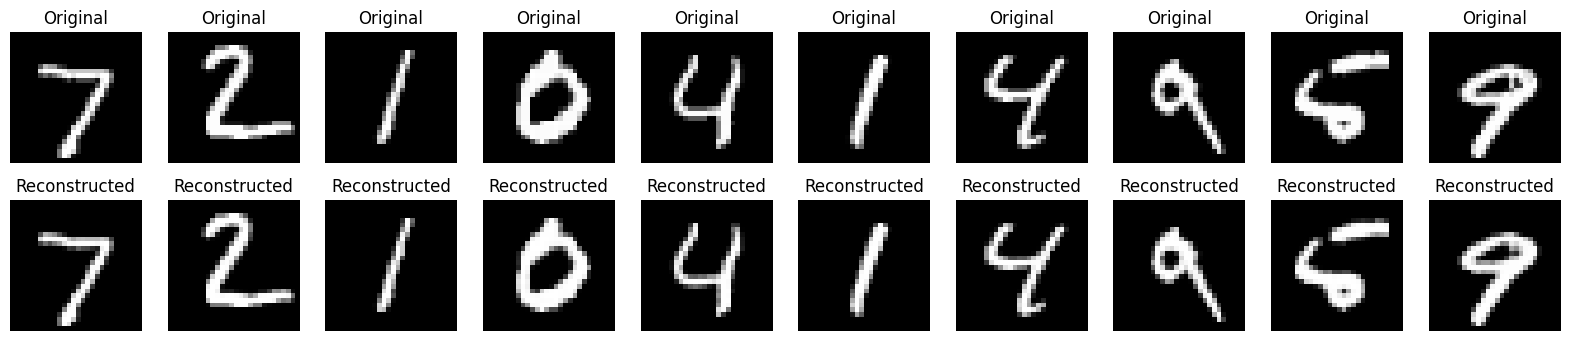

Mean Squared Error: 0.0003955683787353337


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and Preprocess Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Add an extra dimension for channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define Deeper Autoencoder Architecture
input_img = layers.Input(shape=(28, 28, 1))

# ENCODER
# Block 1
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x) # Output: 14x14

# Block 2
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x) # Output: 7x7

# Block 3 (Bottleneck / Latent Space)
# We go deeper into channels (128) but keep spatial dim (7x7)
encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# DECODER
# Block 1
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x) # Output: 14x14

# Block 2
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x) # Output: 28x28

# Block 3 (reconstruction)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and Compile Models
autoencoder = models.Model(input_img, decoded)
encoder = models.Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print summary to see the new deeper structure
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Visualize Results =
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    ax.axis('off')

    # Display reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    ax.axis('off')
plt.show()
# Calculate the Mean Squared Error
mse = np.mean(np.power(x_test - decoded_imgs, 2))
print(f"Mean Squared Error: {mse}")